# Clustering techniques on "Cervical Cancer Risk Classification" dataset.
Authors: Kevin Lagos, Sonny Muñoz, María Retamal

#### Lectura de los paquetes que se utilizarán

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io 
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### Carga y Manipulación de datos

In [ ]:
# Fijamos la semilla que genera numeros aleatorios
np.random.seed(0)

#Carga de los datos
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['kag_risk_factors_cervical_cancer.csv'].decode('utf-8')))

#Cambio de "?" por NaN y paso a tipo float
for col in df.columns: 
    df.loc[df[col]=='?', col]=np.nan
    if df.dtypes[col] == object:
      df = df.astype({col: float})

#Cambio en las variables target para dejarlo como 1 variable target binaria
df["target"] = df[["Biopsy","Hinselmann","Citology","Schiller"]].max(axis=1)
df["target"] = df["target"].astype(np.int64)
del df["Biopsy"]
del df["Hinselmann"] 
del df["Citology"] 
del df["Schiller"]

X = df.dropna()
df = df.dropna() # Borramos filas que son NaN

Saving kag_risk_factors_cervical_cancer.csv to kag_risk_factors_cervical_cancer (1).csv


### Separación de conjuntos de training y test

In [ ]:
y = df.target
print('Class labels:', np.unique(y))
X = X.iloc[:, :-1]

Class labels: [0 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.3, random_state=1, stratify=y)

## Estandarización de los datos



Ajustar los siguientes modelos: LDA, QDA, Árbol de Decisión, Random Forest, Regresión Logística, SVC (lineal y radio basal), Perceptron, Perceptrón Multicapa, K-Neighbors Classifier. Explicar brevemente en qué consiste cada clasificador

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
metricas = []

### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.67
Recall: 0.20
Precisión: 0.33
F1: 0.25


Un perceptrón es un clasificador binario, es decir que es capaz de discriminar solamente entre dos categorías, y estas categorías deben ser linealmente separables, es decir, que si los datos son graficados en un plano, puedan ser divididos por una recta.

### Árbol de Decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(criterion = 'gini', max_depth=4)
arbol.fit(X_train_std, y_train)
y_pred = arbol.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.28
Recall: 0.00
Precisión: 0.00
F1: 0.00


Un árbol de decisión es una estructura de árbol similar a un diagrama de flujo donde un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo hoja representa el resultado. Estos árboles clasifican los ejemplos desde la raíz hasta algún nodo hoja, con el nodo hoja proporcionando la clasificación final (enfoque top-down).

### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.67
Recall: 0.20
Precisión: 0.33
F1: 0.25


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Método de regresión útil para resolver problemas de clasificación binaria, donde se estima la relación entre una variable binaria dependiente y las variables independientes haciendo uso de una función logística (Sigmoide, con valores reales entre 0 y 1).

### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.61
Recall: 0.00
Precisión: 0.00
F1: 0.00


Corresponde a un algoritmo que se usa a modo de clasificador de objetos, basándose en un entrenamiento mediante ejemplos cercanos en el espacio de los elementos, lo que genera un aprendizaje de tipo *lazy*, donde se estima la probabilidad de que un elemento pertenezca a una clase basándose en una función densidad.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(criterion = 'gini', 
                                 n_estimators=25, n_jobs=2)
bosque.fit(X_train_std, y_train)
y_pred = bosque.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.56
Recall: 0.00
Precisión: 0.00
F1: 0.00


En Random Forest se ejecutan varios algoritmos de árbol de decisiones en lugar de uno solo. Para clasificar un nuevo objeto basado en atributos, cada árbol de decisión da una clasificación y finalmente la decisión con mayor “votos” es la predicción del algoritmo.

### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)
y_pred = lda.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.61
Recall: 0.20
Precisión: 0.25
F1: 0.22


LDA es un método de clasificación supervisado de variables cualitativas en el que dos o más grupos son conocidos a priori y nuevas observaciones se clasifican en uno de ellos en función de sus características. Haciendo uso del teorema de Bayes, LDA estima la probabilidad de que una observación, dado un determinado valor de los predictores, pertenezca a cada una de las clases de la variable cualitativa, $P(Y=k|X=x)$. Finalmente se asigna la observación a la clase k para la que la probabilidad predicha es mayor.

### QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_std, y_train)
y_pred = qda.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.72
Recall: 0.20
Precisión: 0.50
F1: 0.29


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA se asemeja en gran medida al LDA, con la única diferencia de que el QDA considera que cada clase k tiene su propia matriz de covarianza ($\Sigma_k$) y, como consecuencia, la función discriminante toma forma cuadrática.

### SVM (lineal)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.61
Recall: 0.20
Precisión: 0.25
F1: 0.22


Se presenta cada dato como un punto que corresponde a un vector de *p*-dimensional, el algoritmo busca un hiperplano que separe de manera óptima a los puntos de una clase de la otra. El hiperplano se define haciendo uso de las características (no de la variable predictora), en el proceso se definen vectores de soporte, que representan la distancia entre un hiperplano y un conjunto de puntos, la cual es la máxima posible.

### SVM (radio basal)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.72
Recall: 0.00
Precisión: 0.00
F1: 0.00


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Posee el mismo comportamiento que SVM lineal, solo que utiliza una función de radio basal para calcular las distancias, la cual se muestra a continuación:

$K(\mathbf {x} ,\mathbf {x’} )=\exp \left(-{\frac {||\mathbf {x} -\mathbf {x’} ||^{2}}{2\sigma ^{2}}}\right)$

Además hace uso de 2 parámetros *gamma* y *c*, donde *gamma* indica que tanta influencia tiene el set de entrenamiento y *c* condiciona el margen con el que se clasifica en conjuntos un elemento.


### Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=500)
mlp.fit(X_train_std, y_train)
y_pred = mlp.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('Precisión: %.2f' % precision_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))
metricas.append((accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy: 0.56
Recall: 0.20
Precisión: 0.20
F1: 0.20


Corresponde a un método basado en redes neuronales, que consiste en 3 capas de nodos, que corresponden a *input*, *hidden* y *output*, en todas las capas menos la de *input* los nodos corresponden a neuronas con una función de activación no lineal, lo cual lo distingue del simple método de perceptron. 

## Métricas


En la siguiente tabla se muestran las métricas de cada método 

In [ ]:
import plotly.graph_objects as go
metodos = ["Perceptron","Árboles de decisión","Regresión logística","K-Nearest Neighbors","Random Forest","LDA","QDA","SVM (lineal)","SVM (radio basal)","Multi-layer perceptron"]
accuracy = []
recall = []
precision = []
f1 = []
tasa_e = []
for i in np.arange(10):
  accuracy.append(metricas[i][0])
  tasa_e.append(1-metricas[i][0])
  recall.append(metricas[i][1])
  precision.append(metricas[i][2])
  f1.append(metricas[i][3])

fig = go.Figure(data=[go.Table(header=dict(values=["Métodos","Accuracy","Tasa de error","Recall (Sensibilidad)","Precisión","F1"]),
                 cells=dict(values=[metodos,accuracy,tasa_e,recall,precision,f1,]))
                     ])
fig.show()


Podemos saber cuáles métodos poseen un mejor desempeño en base a sus indicadores:


*   Los métodos con mejor *Accuracy* son *SVM* (radio basal) y *QDA* , además de muy cerca lo siguen *Perceptron* y *Regresión Logística* (se puede realizar el mismo análisis con la Tasa de error pero buscando las cifras menores).
*   Con respecto a la sensibilidad, la mayoría de los métodos comparten la misma, excepto *Árboles de decisión*, *K-Nearest neighbors*, *Random forest* y *SVM* (radio basal) que poseen menor desempeño.
*   En cuanto a la precisión, se nota que el mejor desempeño lo posee *QDA*, siguiendo por mucho más abajo *Perceptron* y *Regresión logística*.
*   Con respecto al indicador F1 nuevamente *QDA* presenta un mejor desempeño.

Por lo que, se puede concluir en base a la tabla que el método *QDA* presenta un mejor desempeño con respecto a los otros métodos, debido a que muestra mejores resultados en sus indicadores, no solo en Accuracy, sino que también en Sensibilidad, lo cuál es importante para detectar casos positivos (lo cual es bastante relevante en el contexto de salud).



## Clustering

Realizar un estudio comparativo del desempeño de las técnicas de clustering: K-Means, Single-Linkage, Ward, DBSCAN. Obtener los indicadores de desempeño más relevantes. 

In [ ]:
from sklearn import cluster # Técnica de Clustering
from sklearn import datasets # Conjuntos de Datos Sinteticos
from sklearn.neighbors import kneighbors_graph # Técnica de k-Vecino mas cercano
from sklearn.preprocessing import StandardScaler # Ténica para reescalar los datos
from sklearn import metrics
import time   # Calculo de tiempos de ejecución
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
metrics_cluster = []

Las variables ha utilizar en el proceso de clustering son "Age" y "Smoke_years"

### K-Means

In [ ]:
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

new_X = np.array(df[["Age","Smokes (years)"]])



Tiempo de Ajuste: 0.02395153045654297
Estimated number of clusters: 4
Homogeneity: 0.072662
Completeness: 0.030902
V-measure: 0.043362
Adjusted Rand Index: -0.005911
Adjusted Mutual Information: 0.014420
Silhouette Coefficient: 0.218290


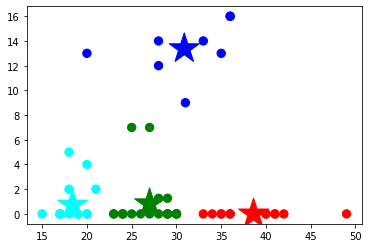

In [ ]:
algoritmo = cluster.KMeans(n_clusters=4)
t0 = time.time()
algoritmo.fit(new_X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)

# Predicting the clusters
labels = algoritmo.predict(new_X)
# Getting the cluster centers
C = algoritmo.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

y_pred = algoritmo.labels_.astype(np.int)
plt.scatter(new_X[:, 0], new_X[:, 1], c=asignar, s=70)
centros = algoritmo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], marker='*', s=1000, c=['red','green','blue','cyan'])

labels = y_pred
labels_true = y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))
metrics_cluster.append((tiempo_ajuste,n_clusters_,metrics.homogeneity_score(labels_true, labels),metrics.completeness_score(labels_true, labels),metrics.v_measure_score(labels_true, labels),metrics.adjusted_rand_score(labels_true, labels),metrics.adjusted_mutual_info_score(labels_true, labels),metrics.silhouette_score(X, labels)))

### Single-Linkage

Estimated number of clusters: 4
Homogeneity: 0.021791
Completeness: 0.020836
V-measure: 0.021303
Adjusted Rand Index: -0.002546
Adjusted Mutual Information: -0.030327
Silhouette Coefficient: 0.187238


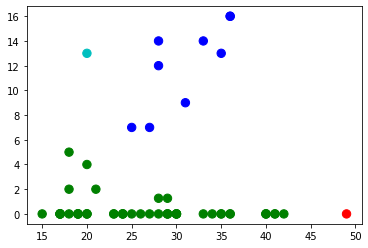

In [ ]:
algoritmo = cluster.AgglomerativeClustering(linkage="single", 
                                            affinity="euclidean", 
                                            n_clusters=4)
# Linkage: single, complete, average, ward
# Affinity: “euclidean”, “l1”, “l2”, “manhattan”, "cityblock", “cosine”, o ‘precomputed’
t0 = time.time()
algoritmo.fit(new_X)
t1 = time.time()

y_pred = algoritmo.labels_.astype(np.int)

plt.scatter(new_X[:, 0], new_X[:, 1], color=colors[y_pred].tolist(), s=70)

labels = y_pred
labels_true = y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))
metrics_cluster.append((tiempo_ajuste,n_clusters_,metrics.homogeneity_score(labels_true, labels),metrics.completeness_score(labels_true, labels),metrics.v_measure_score(labels_true, labels),metrics.adjusted_rand_score(labels_true, labels),metrics.adjusted_mutual_info_score(labels_true, labels),metrics.silhouette_score(X, labels)))

### DBSCAN

Tiempo de Ajuste: 0.0018057823181152344


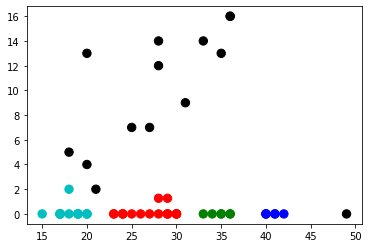

In [ ]:
algoritmo = cluster.DBSCAN(eps=2)

t0 = time.time()
algoritmo.fit(new_X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)

y_pred = algoritmo.labels_.astype(np.int)
plt.scatter(new_X[:, 0], new_X[:, 1], color=colors[y_pred].tolist(), s=70)

In [ ]:
labels = algoritmo.labels_
labels_true = y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))
metrics_cluster.append((tiempo_ajuste,n_clusters_,metrics.homogeneity_score(labels_true, labels),metrics.completeness_score(labels_true, labels),metrics.v_measure_score(labels_true, labels),metrics.adjusted_rand_score(labels_true, labels),metrics.adjusted_mutual_info_score(labels_true, labels),metrics.silhouette_score(X, labels)))

Estimated number of clusters: 4
Homogeneity: 0.082062
Completeness: 0.030677
V-measure: 0.044659
Adjusted Rand Index: -0.026555
Adjusted Mutual Information: 0.008049
Silhouette Coefficient: 0.105917


### WARD

Tiempo de Ajuste: 0.011034250259399414
Estimated number of clusters: 4
Homogeneity: 0.067335
Completeness: 0.028101
V-measure: 0.039653
Adjusted Rand Index: -0.001087
Adjusted Mutual Information: 0.011251
Silhouette Coefficient: 0.209632


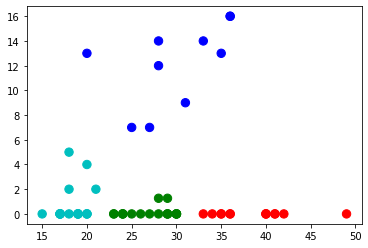

In [ ]:
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
algoritmo = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward',
                                           connectivity=connectivity)
t0 = time.time()
algoritmo.fit(new_X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)

y_pred = algoritmo.labels_.astype(np.int)
plt.scatter(new_X[:, 0], new_X[:, 1], color=colors[y_pred].tolist(), s=70)

labels = y_pred
labels_true = y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))
metrics_cluster.append((tiempo_ajuste,n_clusters_,metrics.homogeneity_score(labels_true, labels),metrics.completeness_score(labels_true, labels),metrics.v_measure_score(labels_true, labels),metrics.adjusted_rand_score(labels_true, labels),metrics.adjusted_mutual_info_score(labels_true, labels),metrics.silhouette_score(X, labels)))

In [ ]:
metodos = ["K-means","Single-linkage","DBSCAN","WARD"]
time = []
n_clusters = []
homogeneity = []
completeness = []
v = []
adj_rand_index = []
adj_mut_info = []
silhouette = []

for i in np.arange(4):
  time.append(round(metrics_cluster[i][0],5))
  n_clusters.append(metrics_cluster[i][1])
  homogeneity.append(round(metrics_cluster[i][2],5))
  completeness.append(round(metrics_cluster[i][3],5))
  v.append(round(metrics_cluster[i][4],5))
  adj_rand_index.append(round(metrics_cluster[i][5],5))
  adj_mut_info.append(round(metrics_cluster[i][6],5))
  silhouette.append(round(metrics_cluster[i][7],5))

fig = go.Figure(data=[go.Table(header=dict(values=["Métodos","Tiempo de ajuste","N° clusters","Homogeneidad","Completeness","V-measure","Adjusted Rand Index","Adjusted Mutual Information","Silhouette Coefficient"]),
                 cells=dict(values=[metodos,time,n_clusters,homogeneity,completeness,v,adj_rand_index,adj_mut_info,silhouette]))
                     ])
fig.show()

Se puede verificar el desempeño de los distintos métodos de clustering analizando las métricas más interesantes, las cuales se encuentran en la tabla:


*   Con respecto al tiempo de ajuste, vemos que DBSCAN toma menor tiempo en formar los clusters.
*   Con respecto a la homogeneidad de los clusters, notamos que DBSCAN posee un mayor valor, con K-means siguiendolo por poco, lo que se traduce en que los puntos de cada clusters solo pertenecen a una clase.
*   Con respecto a Completeness, ocurre lo mismo que con la homogeneidad, DBSCAN presenta un mejor desempeño.
*   Con respecto a V-measure, se presenta nuevamente la misma situación, DBSCAN posee mejor desempeño, siguiendolo por poco K-means.
*   Con respecto al Adjusted Rand Index, el método WARD posee un mejor desempeño que los otros métodos.
*   Con respecto al Adjusted Mutual Information, posee mejor desempeño el método K-means, siguiendo por poco el método DBSCAN.
*    Finalmente, con respecto al coeficiente de Silhouette, los métodos con mejor desempeño corresponden a K-means y WARD, un mal desempeño en esta métrica puede implicar que los elementos de los clusters podrían tener ciertas distribuciones específicas.

Según lo visto en los gráficos: 
*    K-means realiza clusters de buena manera en los datos que se encuentran en la parte inferior, sin embargo, algunos datos pintados de verde deberían haber sido azules. 
*    Single-linkage, realiza dos buenos clusters debido a que agrupan gran cantidad de datos (verde y azul), pero termina por crear 2 clusters que se componen de 1 solo dato.
*    DBSCAN, realiza buenos cluster en la parte inferior, sin embargo, deja muchos outliers en la parte superior sin agrupar.
*    WARD, realiza un buen trabajo agrupando clusters, presenta un comportamiento similar a K-means y DBSCAN.

Teniendo en cuenta lo antes ya mencionado con respecto al desempeño basado en las diferentes métricas y gráficos, además de tener en cuenta las malas métricas de desempeño debido a la distribución de los datos, se puede destacar el desempeño del método DBSCAN como el de K-means, que fueron superiores en promedio a los otros 2 métodos.
